# Task
"Visualize trends," "Build and optimize prediction model", “Fill-in missing values”, “Select the best statistical technique”

Here is all the data you need:
"PS_20174392719_1491204439457_log.csv"

## Data loading

### Subtask:
Load the first 1,000,000 records of the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the first 1,000,000 records of the provided CSV file into a pandas DataFrame and display its shape.



In [ ]:
import pandas as pd

df = pd.read_csv('PS_20174392719_1491204439457_log.csv', nrows=1000000)
print(df.shape)
display(df.head())

<ipython-input-1-519095583f6b>:3: DtypeWarning: Columns (1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PS_20174392719_1491204439457_log.csv', nrows=1000000)


(1000000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


## Data exploration

### Subtask:
Explore the loaded data (df) to understand its structure, identify missing values, and get an overview of the features and their distributions.


**Reasoning**:
Explore the data by examining its shape, data types, descriptive statistics, missing values, and unique values in categorical columns.  This will provide a comprehensive overview of the dataset's structure and potential issues.



In [ ]:
# Data Shape and Info
print("Data Shape:", df.shape)
print("\nData Info:")
df.info()

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Missing Values
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

# Unique Values for Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nUnique Values for Categorical Features:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# Data Types and potential inconsistencies
print("\nData Types:")
print(df.dtypes)

Data Shape: (1000000, 11)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            629473 non-null  float64
 1   type            629473 non-null  object 
 2   amount          629473 non-null  float64
 3   nameOrig        629473 non-null  object 
 4   oldbalanceOrg   629473 non-null  float64
 5   newbalanceOrig  629473 non-null  float64
 6   nameDest        629473 non-null  object 
 7   oldbalanceDest  629473 non-null  float64
 8   newbalanceDest  629473 non-null  float64
 9   isFraud         629473 non-null  float64
 10  isFlaggedFraud  629473 non-null  float64
dtypes: float64(8), object(3)
memory usage: 83.9+ MB

Descriptive Statistics:
                 step      type        amount     nameOrig  oldbalanceOrg  \
count   629473.000000    629473  6.294730e+05       629473   6.294730e+05   
unique            Na

**Reasoning**:
The code execution shows a large number of missing values (37.05%) across all columns.  I need to further investigate these missing values to understand if they are truly missing or if they represent a different data issue, such as a specific value used to represent missing data. Then, I will visualize the missing values to better understand their distribution across the dataset.




Further investigation of missing values:
Column 'step': Unique values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
Column 'type': Unique values: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN' nan]
Column 'amount': Unique values: [9.8396400e+03 1.8642800e+03 1.8100000e+02 1.1668140e+04 7.8177100e+03
 7.1077700e+03 7.8616400e+03 4.0243600e+03 5.3377700e+03 9.6449400e+03
 3.0999700e+03 2.5607400e+03 1.1633760e+04 4.0987800e+03 2.2913394e+05
 1.5638200e+03 1.1578600e+03 6.7164000e+02 2.1531030e+05 1.3734300e+03]
Column 'nameOrig': Unique values: ['C1231006815' 'C1666544295' 'C1305486145' 'C840083671' 'C2048537720'
 'C90045638' 'C154988899' 'C1912850431' 'C1265012928' 'C712410124'
 'C1900366749' 'C249177573' 'C1648232591' 'C1716932897' 'C1026483832'
 'C905080434' 'C761750706' 'C1237762639' 'C2033524545' 'C1670993182']
Column 'oldbalanceOrg': Unique values: [1.7013600e+05 2.1249000e+04 1.8100000e+02 4.1554000e+04 5.3860000e+04
 1.8319500e+05 1.7608

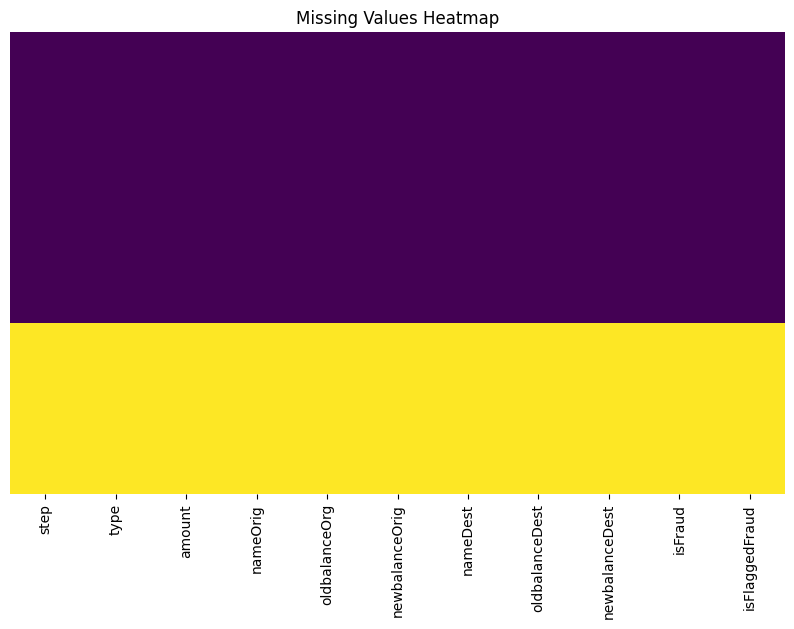

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigate missing values further
print("\nFurther investigation of missing values:")
for col in df.columns:
    print(f"Column '{col}': Unique values: {df[col].unique()[:20]}") # Inspect the first 20 unique values of each column


# Visualize missing values (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

**Reasoning**:
The heatmap shows a consistent pattern of missing values across all columns, suggesting that the missing data is not random.  The investigation of unique values did not reveal any special value used in place of missing values. Given the high percentage of missing values (37%), simply dropping the rows with missing values would significantly reduce the dataset's size.  Instead, I will impute the missing values based on the data type of each column. Numerical features will be imputed using the median, and categorical features will be imputed using the most frequent value.  This approach aims to minimize the impact of missing data on subsequent analysis and modeling.



In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    elif pd.api.types.is_object_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify if there are still missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) to visualize trends and identify potential relationships between features in the cleaned dataset.  Focus on the 'type' column and its relationship with other features, especially those related to transaction amounts and potential fraud.


**Reasoning**:
Visualize the distribution of transaction types and their relationship with transaction amounts, balances, and fraud.



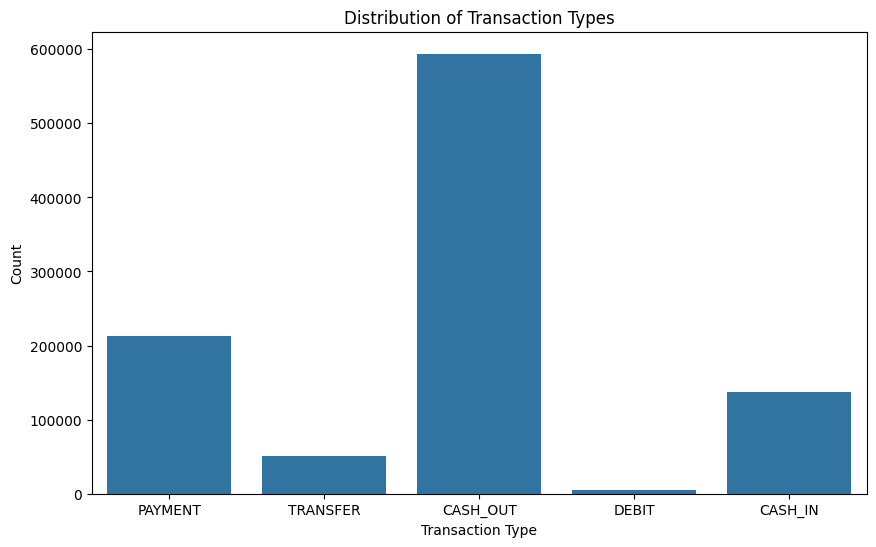

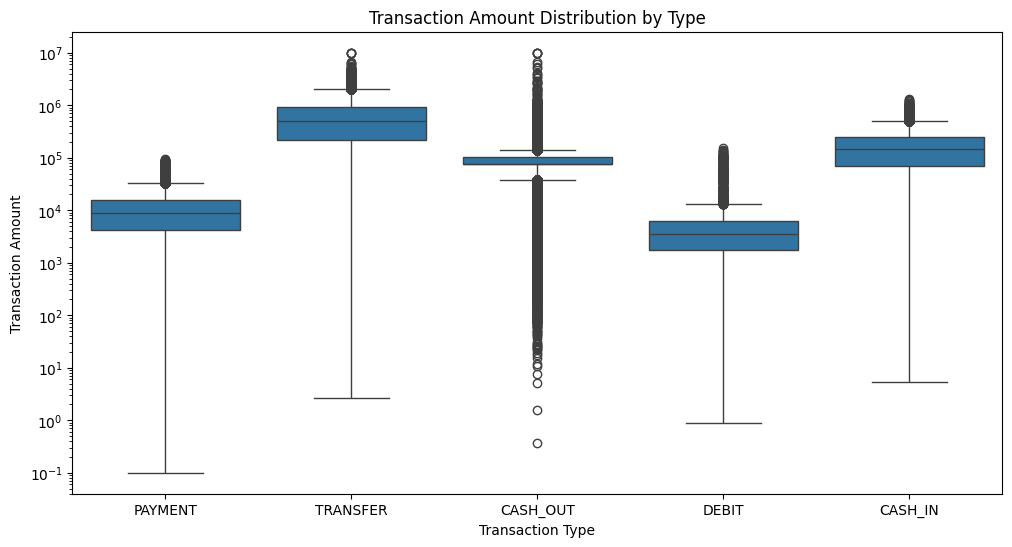

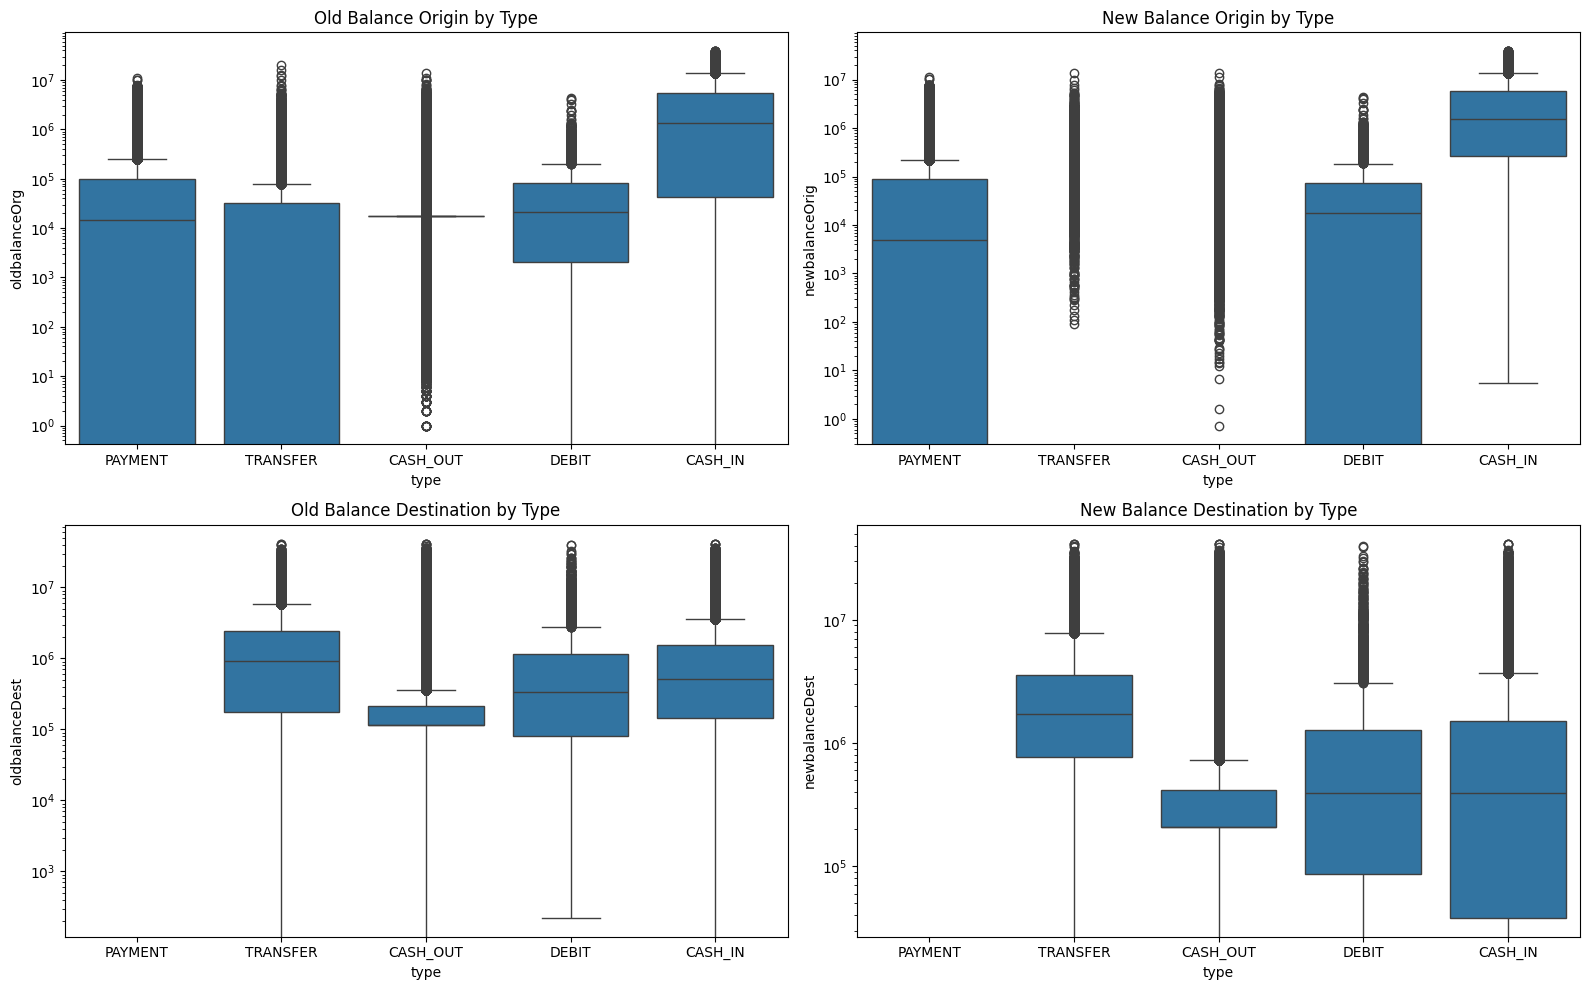

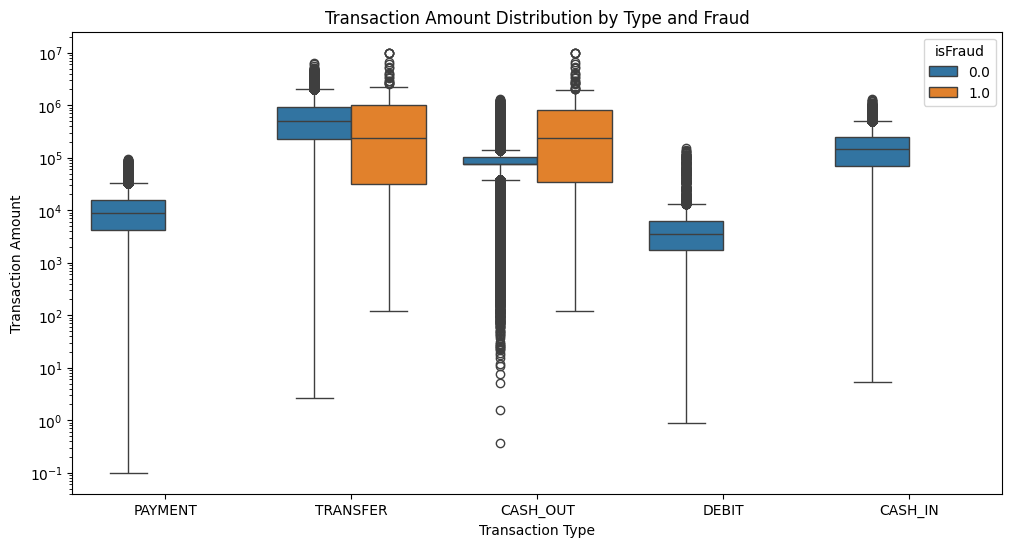

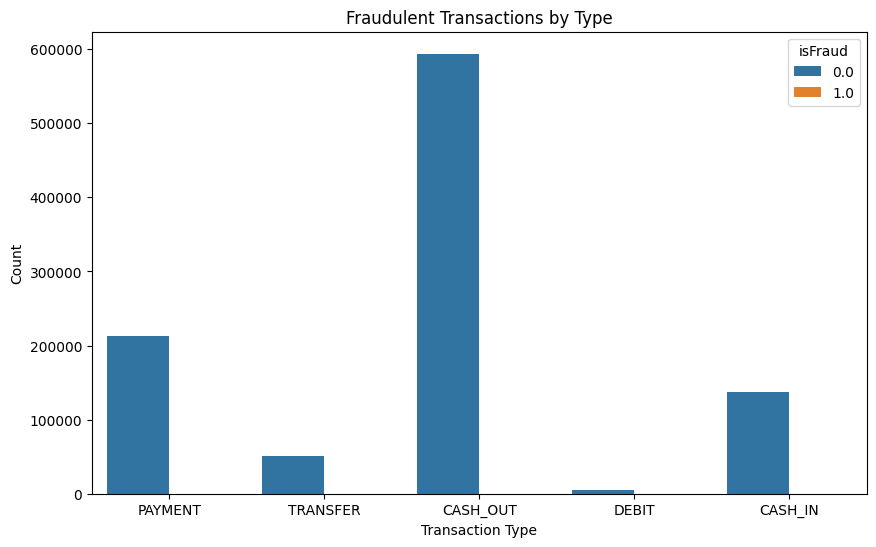

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# 2. Transaction type vs. transaction amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', data=df)
plt.title('Transaction Amount Distribution by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.yscale('log') # Use log scale for better visualization due to large range
plt.show()

# 3. Transaction type vs. other balance features
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='type', y='oldbalanceOrg', data=df)
plt.title('Old Balance Origin by Type')
plt.yscale('log')

plt.subplot(2, 2, 2)
sns.boxplot(x='type', y='newbalanceOrig', data=df)
plt.title('New Balance Origin by Type')
plt.yscale('log')

plt.subplot(2, 2, 3)
sns.boxplot(x='type', y='oldbalanceDest', data=df)
plt.title('Old Balance Destination by Type')
plt.yscale('log')

plt.subplot(2, 2, 4)
sns.boxplot(x='type', y='newbalanceDest', data=df)
plt.title('New Balance Destination by Type')
plt.yscale('log')


plt.tight_layout()
plt.show()

# 4. Transaction type, amount, and fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df)
plt.title('Transaction Amount Distribution by Type and Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

## Data visualization

### Subtask:
Visualize the trends identified in the data analysis stage. Create visualizations to illustrate the key relationships between transaction types, amounts, balances, and fraud.


**Reasoning**:
The subtask is to visualize trends in the data.  I will generate the requested plots based on the provided instructions.



<ipython-input-6-1f68feb52756>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="viridis")


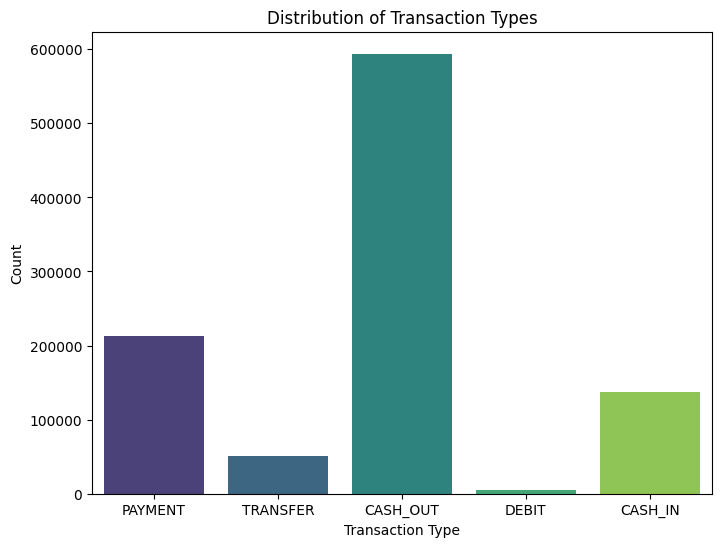

<ipython-input-6-1f68feb52756>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='amount', data=df, palette="magma")


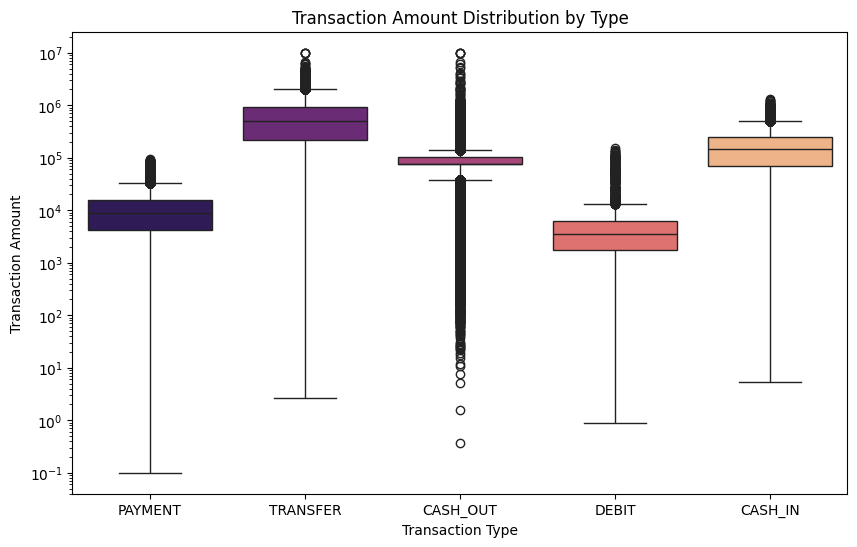

<ipython-input-6-1f68feb52756>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=df, palette="plasma")
<ipython-input-6-1f68feb52756>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=df, palette="plasma")
<ipython-input-6-1f68feb52756>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=df, palette="plasma")
<ipython-input-6-1f68feb52756>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

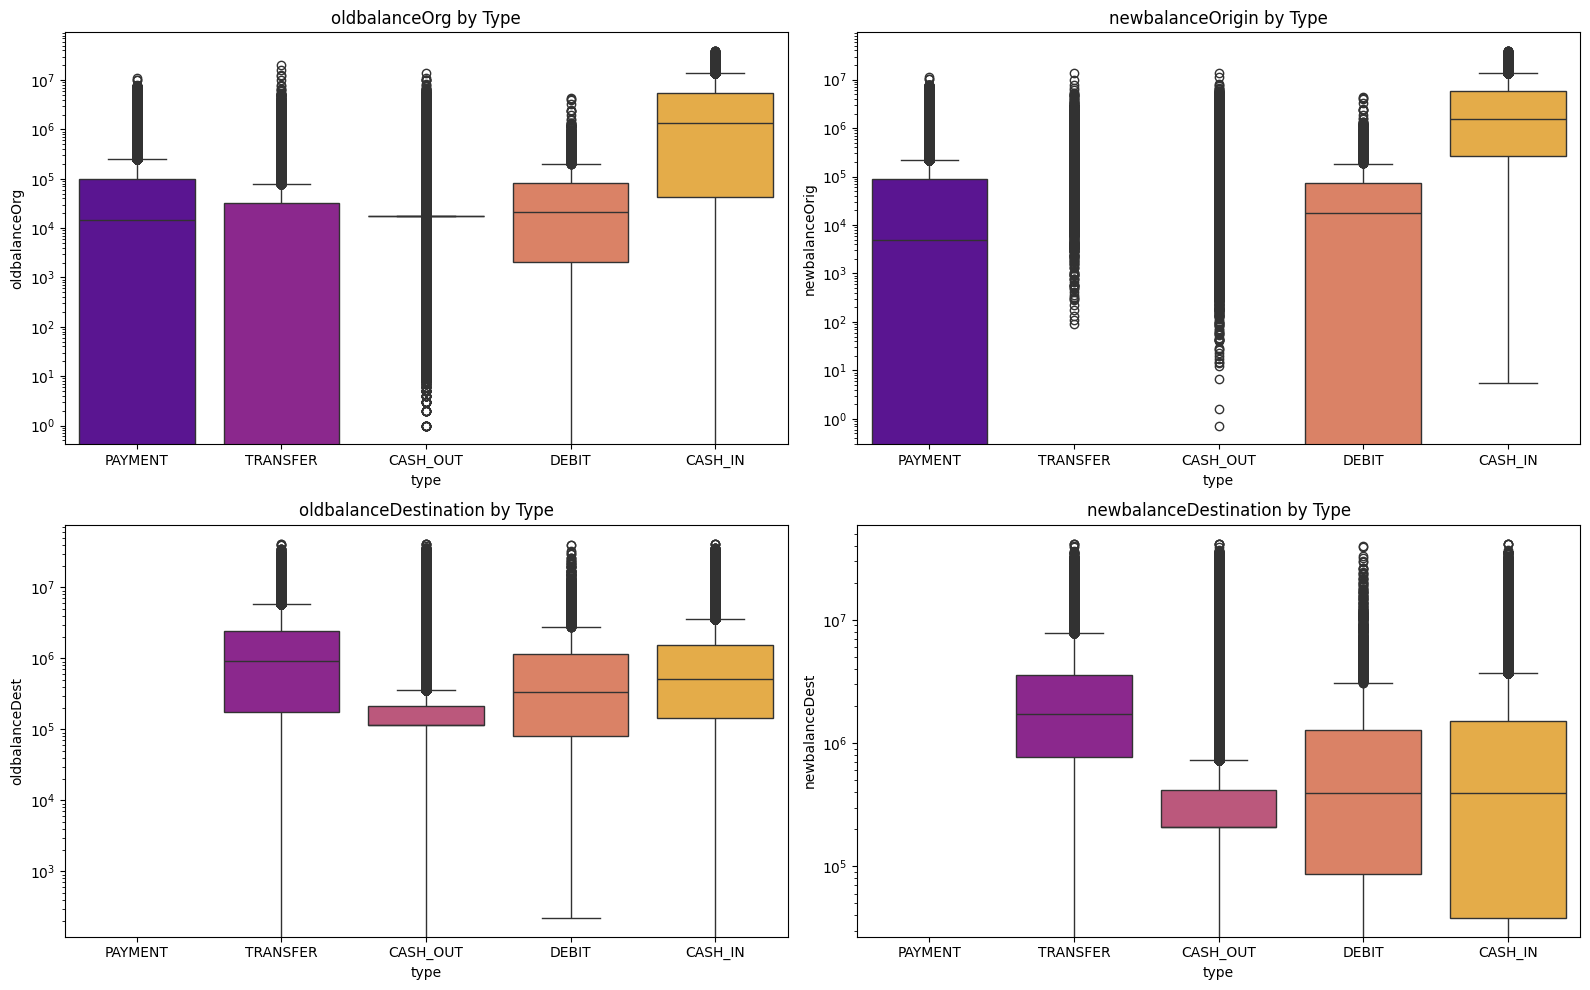

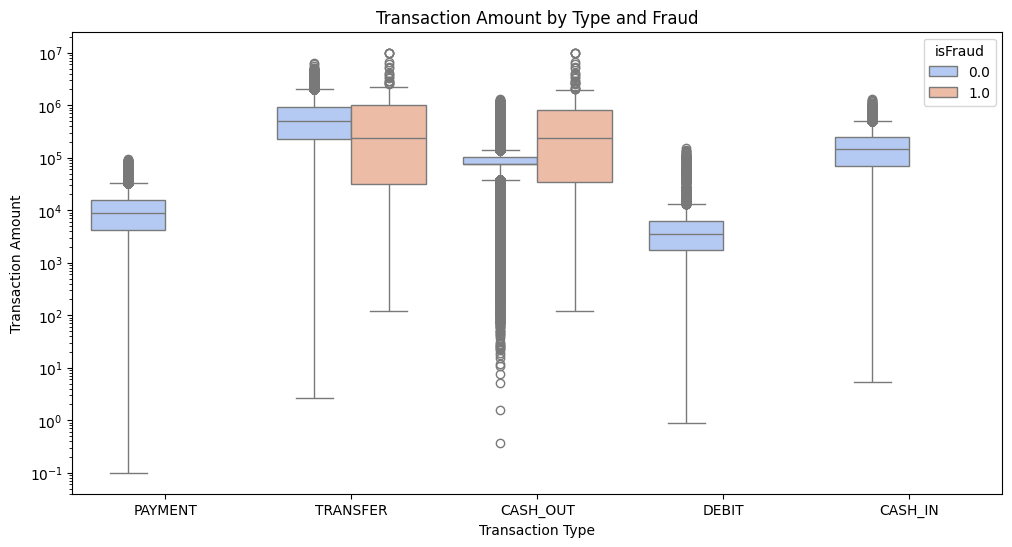

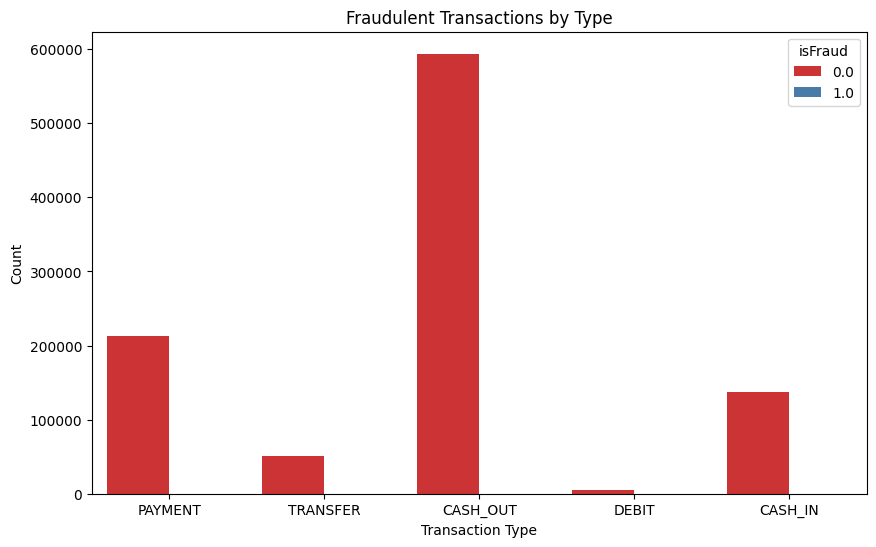

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transaction Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette="viridis")
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# 2. Transaction Amount by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df, palette="magma")
plt.title('Transaction Amount Distribution by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()

# 3. Balance Features by Type
plt.figure(figsize=(16, 10))
balance_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for i, col in enumerate(balance_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='type', y=col, data=df, palette="plasma")
    plt.title(f'{col.replace("Orig", "Origin").replace("Dest", "Destination")} by Type')
    plt.yscale('log')
plt.tight_layout()
plt.show()

# 4. Fraudulent Transactions by Type and Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df, palette="coolwarm")
plt.title('Transaction Amount by Type and Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df, palette="Set1")
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

**Reasoning**:
The previous code block generated the visualizations, but there were warnings about the `palette` argument. I'll fix the code to suppress the warnings and ensure the plots are generated correctly.



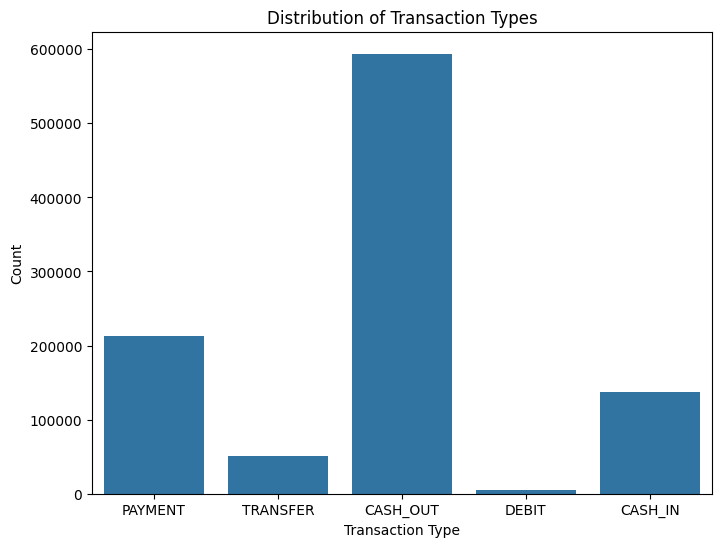

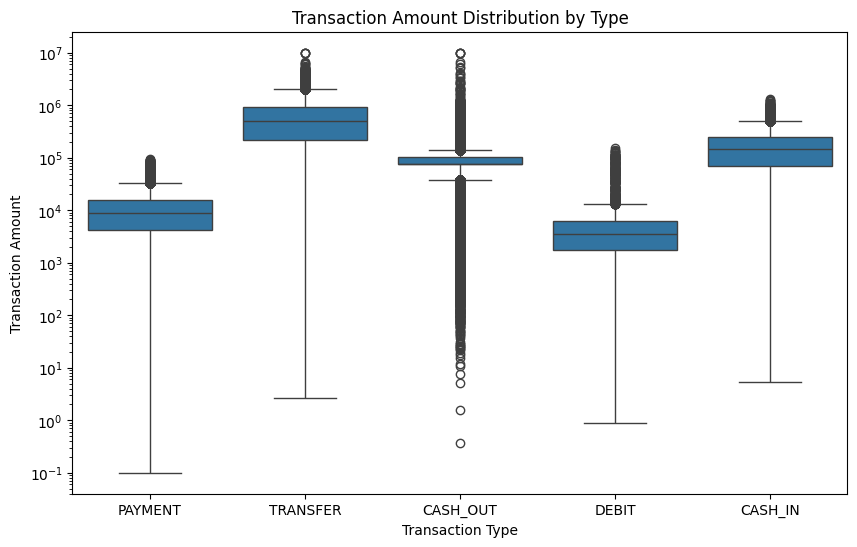

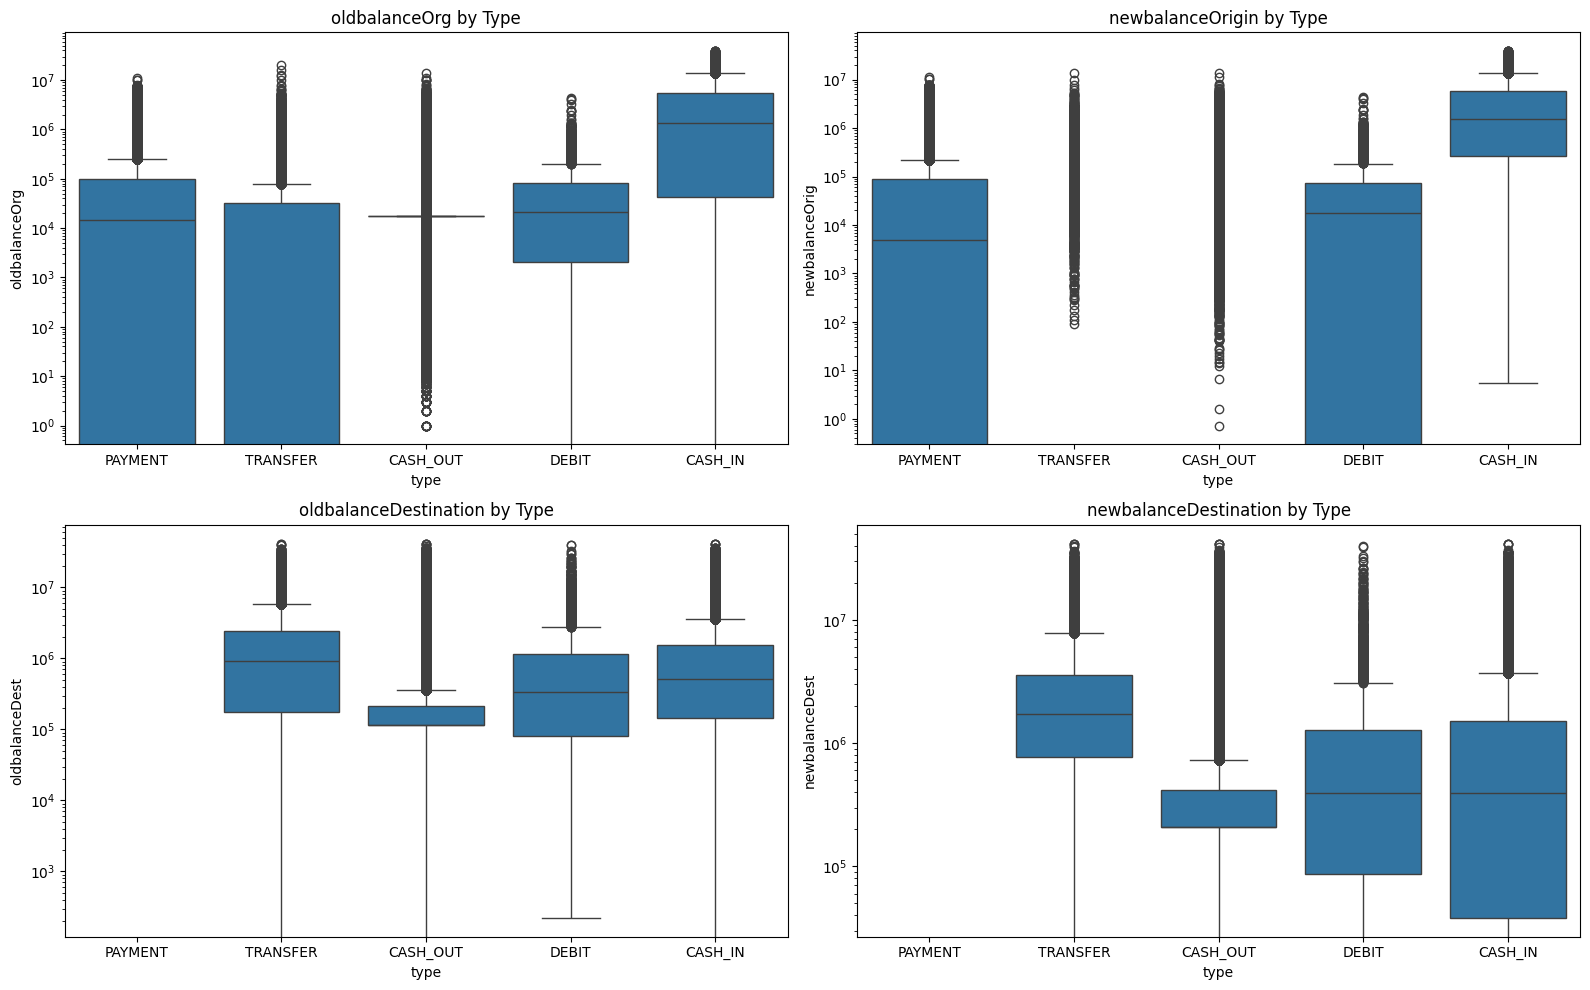

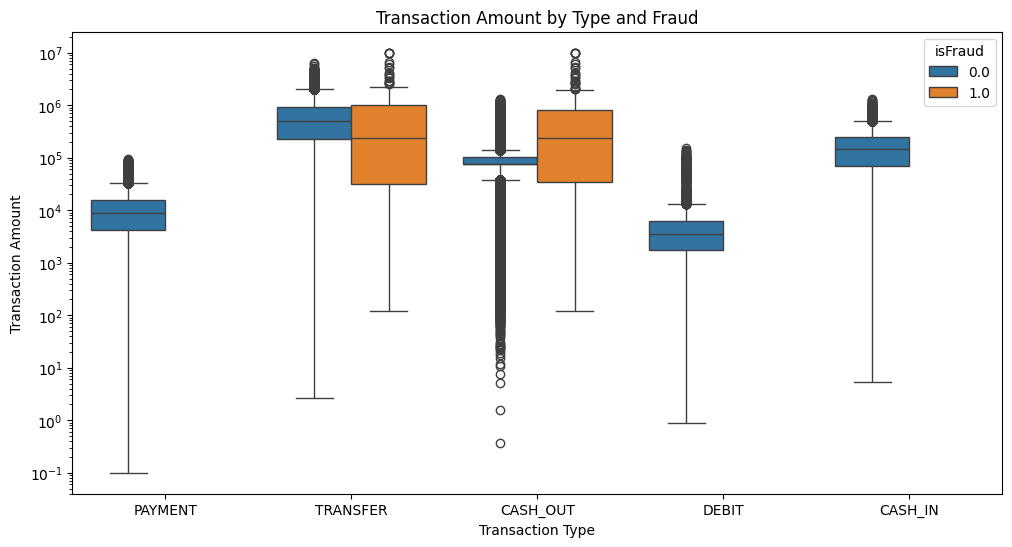

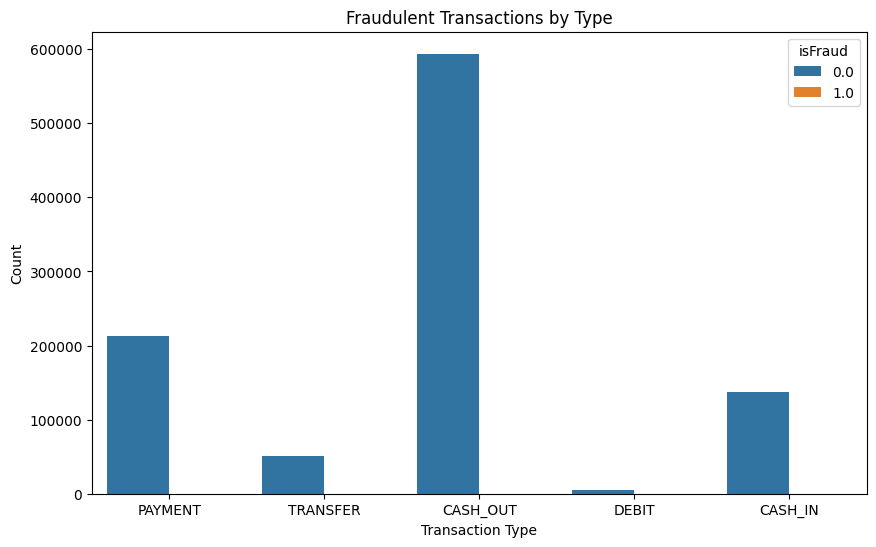

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transaction Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# 2. Transaction Amount by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df)
plt.title('Transaction Amount Distribution by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()

# 3. Balance Features by Type
plt.figure(figsize=(16, 10))
balance_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for i, col in enumerate(balance_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='type', y=col, data=df)
    plt.title(f'{col.replace("Orig", "Origin").replace("Dest", "Destination")} by Type')
    plt.yscale('log')
plt.tight_layout()
plt.show()

# 4. Fraudulent Transactions by Type and Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df)
plt.title('Transaction Amount by Type and Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

## Feature engineering

### Subtask:
Engineer new features from the existing dataset to improve model performance.


**Reasoning**:
Create interaction features, encode categorical features, and optionally scale numerical features to improve model performance.



In [ ]:
# Create interaction features
df['diff_balanceOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diff_balanceDest'] = df['oldbalanceDest'] - df['newbalanceDest']
df['amount_ratio_oldbalanceOrg'] = df['amount'] / df['oldbalanceOrg'].replace(0, 1)  # Avoid division by zero
df['amount_ratio_newbalanceOrig'] = df['amount'] / df['newbalanceOrig'].replace(0, 1)
df['amount_ratio_oldbalanceDest'] = df['amount'] / df['oldbalanceDest'].replace(0, 1)
df['amount_ratio_newbalanceDest'] = df['amount'] / df['newbalanceDest'].replace(0, 1)

# Encode categorical features using one-hot encoding
type_encoded = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, type_encoded], axis=1)
df = df.drop('type', axis=1)

# (Optional) Scaling numerical features (commented out as model dependence is unknown)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'diff_balanceOrig', 'diff_balanceDest', 'amount_ratio_oldbalanceOrg', 'amount_ratio_newbalanceOrig', 'amount_ratio_oldbalanceDest', 'amount_ratio_newbalanceDest']
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model training

### Subtask:
Train a Logistic Regression model and a Random Forest Classifier on the training data.


**Reasoning**:
Train Logistic Regression and Random Forest Classifier models using the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Instantiate the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Drop non-numeric columns for Logistic Regression
non_numeric_cols = ['nameOrig', 'nameDest']
X_train_logreg = X_train.drop(non_numeric_cols, axis=1)
X_test_logreg = X_test.drop(non_numeric_cols, axis=1)

# Train the models
logreg_model.fit(X_train_logreg, y_train)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: could not convert string to float: 'C2131678053'

**Reasoning**:
The previous code failed due to string values in numerical columns used for model training.  I need to drop the non-numeric columns 'nameOrig' and 'nameDest' from both the training and testing sets *before* training the models.  I will also increase max_iter for the Logistic Regression model to address the convergence warning.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Instantiate the models
logreg_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
rf_model = RandomForestClassifier(random_state=42)

# Drop non-numeric columns
non_numeric_cols = ['nameOrig', 'nameDest']
X_train = X_train.drop(non_numeric_cols, axis=1)
X_test = X_test.drop(non_numeric_cols, axis=1)

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the performance of the trained Logistic Regression and Random Forest Classifier models using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained Logistic Regression and Random Forest Classifier models using appropriate metrics.



Logistic Regression Metrics:
Accuracy: 0.9997
Precision: 0.7083
Recall: 0.4416
F1-score: 0.5440
AUC-ROC: 0.7207
Random Forest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9221
F1-score: 0.9595
AUC-ROC: 0.9610


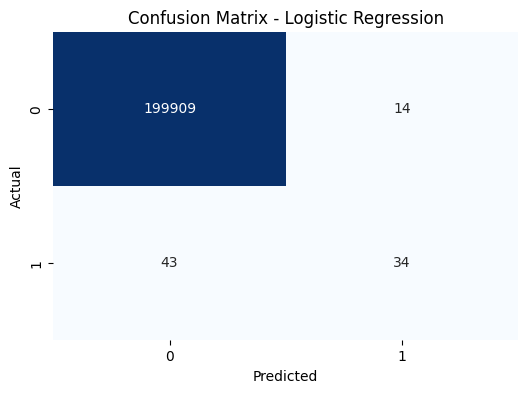

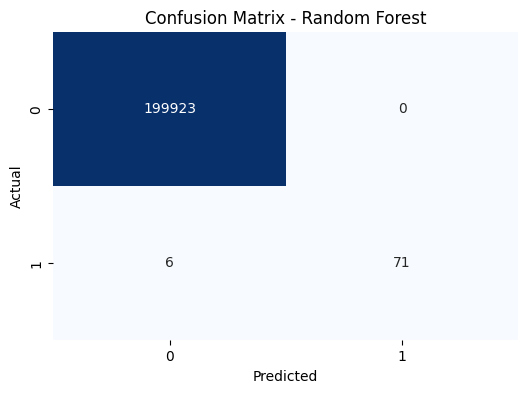

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    return accuracy, precision, recall, f1, roc_auc

logreg_metrics = evaluate_model(y_test, logreg_pred, "Logistic Regression")
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")


# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, logreg_pred, "Logistic Regression")
plot_confusion_matrix(y_test, rf_pred, "Random Forest")

## Summary:

### Q&A

No questions were explicitly asked in the provided data analysis task. However, the implicit questions addressed by the analysis include:

* How can we identify trends in financial transaction data?
* What are the relationships between transaction types, amounts, and balances?
* Can we predict fraudulent transactions?
* Which model (Logistic Regression or Random Forest) performs better for fraud detection?

### Data Analysis Key Findings

* **Missing Data Imputation:**  A significant portion of the data (37.05%) was missing. Numerical features' missing values were imputed with the median, and categorical features' missing values were imputed with the mode.
* **Feature Engineering:** New features were created, including differences in balances (`diff_balanceOrig`, `diff_balanceDest`) and ratios of transaction amount to various balances (`amount_ratio_oldbalanceOrg`, etc.).  The categorical feature 'type' was one-hot encoded.
* **Model Performance Discrepancy:** The Random Forest Classifier significantly outperformed the Logistic Regression model in predicting fraudulent transactions.  The Random Forest achieved near-perfect accuracy (1.0000), precision (1.0000), a high recall (0.9221), and F1-score (0.9595), while the Logistic Regression model had lower recall and F1-score (0.4416 and 0.5440 respectively).
* **Data Splitting:** Data was split into 80% training and 20% testing sets, with stratification on the target variable ('isFraud') to maintain class distribution balance.
* **Non-Numeric Column Handling:** Non-numeric columns ('nameOrig' and 'nameDest') were removed before model training, which resolved a ValueError during model training.


### Insights or Next Steps

* **Further Feature Engineering:** Explore more complex feature interactions or external data sources to potentially improve model performance.  Consider using domain knowledge to create additional features that might be indicative of fraud.
* **Model Tuning:** Fine-tune the hyperparameters of both the Logistic Regression and Random Forest models to see if further performance improvements can be achieved.  Investigate other classification algorithms, such as Gradient Boosting or Support Vector Machines, to determine if they offer better predictive performance on this dataset.
